In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

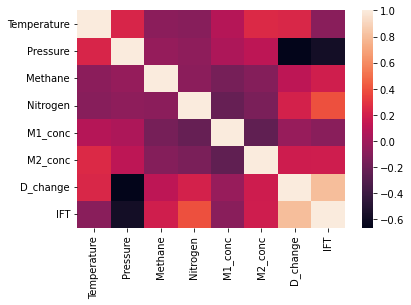

In [3]:
sns.heatmap(df.corr())

In [4]:
X= df. drop(['IFT','Phase'],axis=1)

In [5]:
y=df.IFT.astype(float)

In [6]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))
X.index=x_cat.index
X=pd.concat([X,x_cat],axis=1)
X

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
X=X.drop(["Salttype"],axis=1)
y.index=X.index

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

Using TensorFlow backend


C:\Users\Paa Kwasi\AppData\Local\Temp\ipykernel_22308\3796592592.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [19]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=7,
    directory="C:/Users/Paa Kwasi/Desktop/Interfacial tension research",
    project_name='IFT_project_2'
)    

Reloading Tuner from C:/Users/Paa Kwasi/Desktop/Interfacial tension research\IFT_project_2\tuner0.json


In [20]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

In [21]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
#num_epochs = best_hps.get('epochs')

In [22]:
print(best_hps.values)

{'units': 320, 'learning_rate': 0.0001}


In [23]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('val_mse')<1.5:
            self.model.stop_training=True

In [24]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5000,callbacks=Mycallback())

Epoch 1/5000
39/39 [==============================] - 1s 10ms/step - loss: 1767.4628 - mse: 1767.4628 - mae: 40.4179 - val_loss: 1591.4137 - val_mse: 1591.4137 - val_mae: 38.1538
Epoch 2/5000
39/39 [==============================] - 0s 6ms/step - loss: 1095.2440 - mse: 1095.2440 - mae: 30.2708 - val_loss: 177.0143 - val_mse: 177.0143 - val_mae: 10.0585
Epoch 3/5000
39/39 [==============================] - 0s 6ms/step - loss: 113.5171 - mse: 113.5171 - mae: 8.1594 - val_loss: 95.2088 - val_mse: 95.2088 - val_mae: 7.3367
Epoch 4/5000
39/39 [==============================] - 0s 5ms/step - loss: 76.3134 - mse: 76.3134 - mae: 6.5572 - val_loss: 74.1512 - val_mse: 74.1512 - val_mae: 6.5333
Epoch 5/5000
39/39 [==============================] - 0s 6ms/step - loss: 58.1302 - mse: 58.1302 - mae: 5.6681 - val_loss: 57.2393 - val_mse: 57.2393 - val_mae: 5.7638
Epoch 6/5000
39/39 [==============================] - 0s 6ms/step - loss: 44.2597 - mse: 44.2597 - mae: 4.9432 - val_loss: 42.1050 - val_ms

Epoch 50/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.6396 - mse: 6.6396 - mae: 1.7618 - val_loss: 6.8819 - val_mse: 6.8819 - val_mae: 1.8316
Epoch 51/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.4786 - mse: 6.4786 - mae: 1.7542 - val_loss: 8.4786 - val_mse: 8.4786 - val_mae: 2.1485
Epoch 52/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.6235 - mse: 6.6235 - mae: 1.7839 - val_loss: 6.8568 - val_mse: 6.8568 - val_mae: 1.8180
Epoch 53/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.3803 - mse: 6.3803 - mae: 1.7591 - val_loss: 6.3971 - val_mse: 6.3971 - val_mae: 1.7850
Epoch 54/5000
39/39 [==============================] - 0s 5ms/step - loss: 5.9701 - mse: 5.9701 - mae: 1.6708 - val_loss: 6.2033 - val_mse: 6.2033 - val_mae: 1.7587
Epoch 55/5000
39/39 [==============================] - 0s 5ms/step - loss: 5.8251 - mse: 5.8251 - mae: 1.6661 - val_loss: 6.5921 - val_mse: 6.5921 - val_mae: 1.8313
Epoch 56/5

Epoch 100/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.4024 - mse: 3.4024 - mae: 1.2962 - val_loss: 3.5400 - val_mse: 3.5400 - val_mae: 1.3269
Epoch 101/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.9036 - mse: 2.9036 - mae: 1.1456 - val_loss: 3.2749 - val_mse: 3.2749 - val_mae: 1.2398
Epoch 102/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.9766 - mse: 2.9766 - mae: 1.1897 - val_loss: 3.2703 - val_mse: 3.2703 - val_mae: 1.2582
Epoch 103/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8536 - mse: 2.8536 - mae: 1.1152 - val_loss: 3.4620 - val_mse: 3.4620 - val_mae: 1.2924
Epoch 104/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.7530 - mse: 2.7530 - mae: 1.1132 - val_loss: 3.3649 - val_mse: 3.3649 - val_mae: 1.3116
Epoch 105/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.8056 - mse: 2.8056 - mae: 1.1090 - val_loss: 3.3840 - val_mse: 3.3840 - val_mae: 1.3146
Epoc

39/39 [==============================] - 0s 6ms/step - loss: 2.0369 - mse: 2.0369 - mae: 0.9132 - val_loss: 2.5630 - val_mse: 2.5630 - val_mae: 1.1255
Epoch 150/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1881 - mse: 2.1881 - mae: 1.0087 - val_loss: 2.7958 - val_mse: 2.7958 - val_mae: 1.2124
Epoch 151/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1084 - mse: 2.1084 - mae: 0.9521 - val_loss: 2.4454 - val_mse: 2.4454 - val_mae: 1.0804
Epoch 152/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0891 - mse: 2.0891 - mae: 0.9436 - val_loss: 2.4459 - val_mse: 2.4459 - val_mae: 1.1038
Epoch 153/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0174 - mse: 2.0174 - mae: 0.9270 - val_loss: 2.4380 - val_mse: 2.4380 - val_mae: 1.1005
Epoch 154/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0800 - mse: 2.0800 - mae: 0.9405 - val_loss: 2.6701 - val_mse: 2.6701 - val_mae: 1.1163
Epoch 155/5000
39/3

39/39 [==============================] - 0s 5ms/step - loss: 1.8389 - mse: 1.8389 - mae: 0.8849 - val_loss: 2.1781 - val_mse: 2.1781 - val_mae: 1.0285
Epoch 199/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8003 - mse: 1.8003 - mae: 0.9055 - val_loss: 2.5463 - val_mse: 2.5463 - val_mae: 1.1048
Epoch 200/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9159 - mse: 1.9159 - mae: 0.9379 - val_loss: 2.2388 - val_mse: 2.2388 - val_mae: 1.0590
Epoch 201/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.7725 - mse: 1.7725 - mae: 0.8805 - val_loss: 2.2029 - val_mse: 2.2029 - val_mae: 1.0391
Epoch 202/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8781 - mse: 1.8781 - mae: 0.9089 - val_loss: 2.3186 - val_mse: 2.3186 - val_mae: 1.0631
Epoch 203/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8544 - mse: 1.8544 - mae: 0.9312 - val_loss: 2.3385 - val_mse: 2.3385 - val_mae: 1.1061
Epoch 204/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.7776 - mse: 1.7776 - mae: 0.9134 - val_loss: 1.9460 - val_mse: 1.9460 - val_mae: 0.9680
Epoch 248/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8852 - mse: 1.8852 - mae: 0.9477 - val_loss: 1.9353 - val_mse: 1.9353 - val_mae: 0.9788
Epoch 249/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.6552 - mse: 1.6552 - mae: 0.8673 - val_loss: 2.0425 - val_mse: 2.0425 - val_mae: 1.0333
Epoch 250/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8070 - mse: 1.8070 - mae: 0.9100 - val_loss: 2.6926 - val_mse: 2.6926 - val_mae: 1.2993
Epoch 251/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.6042 - mse: 1.6042 - mae: 0.8313 - val_loss: 2.0537 - val_mse: 2.0537 - val_mae: 1.0662
Epoch 252/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.7054 - mse: 1.7054 - mae: 0.8975 - val_loss: 2.3422 - val_mse: 2.3422 - val_mae: 1.1382
Epoch 253/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.4367 - mse: 1.4367 - mae: 0.7753 - val_loss: 1.8200 - val_mse: 1.8200 - val_mae: 0.9781
Epoch 297/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.4198 - mse: 1.4198 - mae: 0.7863 - val_loss: 1.8415 - val_mse: 1.8415 - val_mae: 0.9809
Epoch 298/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.5335 - mse: 1.5335 - mae: 0.8303 - val_loss: 1.9339 - val_mse: 1.9339 - val_mae: 0.9936
Epoch 299/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.6161 - mse: 1.6161 - mae: 0.8758 - val_loss: 2.0085 - val_mse: 2.0085 - val_mae: 0.9823
Epoch 300/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.5972 - mse: 1.5972 - mae: 0.8459 - val_loss: 1.9508 - val_mse: 1.9508 - val_mae: 1.0460
Epoch 301/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.5044 - mse: 1.5044 - mae: 0.8302 - val_loss: 1.8177 - val_mse: 1.8177 - val_mae: 0.9661
Epoch 302/5000
39/3

39/39 [==============================] - 0s 7ms/step - loss: 1.3583 - mse: 1.3583 - mae: 0.7609 - val_loss: 2.4364 - val_mse: 2.4364 - val_mae: 1.2094
Epoch 346/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.3513 - mse: 1.3513 - mae: 0.7731 - val_loss: 1.8913 - val_mse: 1.8913 - val_mae: 0.9852
Epoch 347/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.3856 - mse: 1.3856 - mae: 0.7899 - val_loss: 1.8850 - val_mse: 1.8850 - val_mae: 1.0104
Epoch 348/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.3816 - mse: 1.3816 - mae: 0.7798 - val_loss: 1.9272 - val_mse: 1.9272 - val_mae: 1.0076
Epoch 349/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.3732 - mse: 1.3732 - mae: 0.7853 - val_loss: 1.8254 - val_mse: 1.8254 - val_mae: 0.9447
Epoch 350/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.2682 - mse: 1.2682 - mae: 0.7241 - val_loss: 1.8154 - val_mse: 1.8154 - val_mae: 0.9499
Epoch 351/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.4712 - mse: 1.4712 - mae: 0.8655 - val_loss: 1.7741 - val_mse: 1.7741 - val_mae: 0.9814
Epoch 395/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2762 - mse: 1.2762 - mae: 0.7625 - val_loss: 1.8121 - val_mse: 1.8121 - val_mae: 0.9518
Epoch 396/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.1932 - mse: 1.1932 - mae: 0.6932 - val_loss: 1.7810 - val_mse: 1.7810 - val_mae: 0.9607
Epoch 397/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.1961 - mse: 1.1961 - mae: 0.7057 - val_loss: 1.9488 - val_mse: 1.9488 - val_mae: 1.0382
Epoch 398/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2112 - mse: 1.2112 - mae: 0.7103 - val_loss: 1.6826 - val_mse: 1.6826 - val_mae: 0.9111
Epoch 399/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.2558 - mse: 1.2558 - mae: 0.7372 - val_loss: 1.9300 - val_mse: 1.9300 - val_mae: 0.9819
Epoch 400/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.5422 - mse: 1.5422 - mae: 0.8774 - val_loss: 1.6851 - val_mse: 1.6851 - val_mae: 0.9299
Epoch 444/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.1831 - mse: 1.1831 - mae: 0.7089 - val_loss: 2.0281 - val_mse: 2.0281 - val_mae: 1.0412
Epoch 445/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2472 - mse: 1.2472 - mae: 0.7388 - val_loss: 2.1178 - val_mse: 2.1178 - val_mae: 1.1408
Epoch 446/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2528 - mse: 1.2528 - mae: 0.7533 - val_loss: 1.8324 - val_mse: 1.8324 - val_mae: 0.9777
Epoch 447/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.3127 - mse: 1.3127 - mae: 0.7972 - val_loss: 1.7186 - val_mse: 1.7186 - val_mae: 0.9490
Epoch 448/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2355 - mse: 1.2355 - mae: 0.7260 - val_loss: 1.6994 - val_mse: 1.6994 - val_mae: 0.9120
Epoch 449/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.3711 - mse: 1.3711 - mae: 0.8119 - val_loss: 1.8542 - val_mse: 1.8542 - val_mae: 0.9733
Epoch 493/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.2605 - mse: 1.2605 - mae: 0.7563 - val_loss: 1.6764 - val_mse: 1.6764 - val_mae: 0.9027
Epoch 494/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.1745 - mse: 1.1745 - mae: 0.7168 - val_loss: 1.6965 - val_mse: 1.6965 - val_mae: 0.9286
Epoch 495/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.0817 - mse: 1.0817 - mae: 0.6815 - val_loss: 1.6867 - val_mse: 1.6867 - val_mae: 0.9004
Epoch 496/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1172 - mse: 1.1172 - mae: 0.6823 - val_loss: 1.6315 - val_mse: 1.6315 - val_mae: 0.8751
Epoch 497/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.5451 - mse: 1.5451 - mae: 0.8934 - val_loss: 1.7976 - val_mse: 1.7976 - val_mae: 0.9627
Epoch 498/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.1584 - mse: 1.1584 - mae: 0.7133 - val_loss: 1.7462 - val_mse: 1.7462 - val_mae: 0.9400
Epoch 542/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1279 - mse: 1.1279 - mae: 0.6971 - val_loss: 1.6827 - val_mse: 1.6827 - val_mae: 0.8943
Epoch 543/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1356 - mse: 1.1356 - mae: 0.6927 - val_loss: 1.6309 - val_mse: 1.6309 - val_mae: 0.8904
Epoch 544/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.1333 - mse: 1.1333 - mae: 0.6950 - val_loss: 1.6801 - val_mse: 1.6801 - val_mae: 0.8992
Epoch 545/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.1373 - mse: 1.1373 - mae: 0.7019 - val_loss: 1.6316 - val_mse: 1.6316 - val_mae: 0.8910
Epoch 546/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.2217 - mse: 1.2217 - mae: 0.7541 - val_loss: 1.6594 - val_mse: 1.6594 - val_mae: 0.9064
Epoch 547/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.1116 - mse: 1.1116 - mae: 0.6986 - val_loss: 1.6657 - val_mse: 1.6657 - val_mae: 0.8987
Epoch 591/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0419 - mse: 1.0419 - mae: 0.6589 - val_loss: 1.6797 - val_mse: 1.6797 - val_mae: 0.9083
Epoch 592/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0605 - mse: 1.0605 - mae: 0.6795 - val_loss: 1.6757 - val_mse: 1.6757 - val_mae: 0.9203
Epoch 593/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1243 - mse: 1.1243 - mae: 0.7046 - val_loss: 1.7406 - val_mse: 1.7406 - val_mae: 0.9186
Epoch 594/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0259 - mse: 1.0259 - mae: 0.6611 - val_loss: 1.6185 - val_mse: 1.6185 - val_mae: 0.8780
Epoch 595/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1160 - mse: 1.1160 - mae: 0.7053 - val_loss: 1.8661 - val_mse: 1.8661 - val_mae: 0.9595
Epoch 596/5000
39/3

39/39 [==============================] - 0s 7ms/step - loss: 1.1372 - mse: 1.1372 - mae: 0.7174 - val_loss: 1.6899 - val_mse: 1.6899 - val_mae: 0.9170
Epoch 640/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0874 - mse: 1.0874 - mae: 0.6795 - val_loss: 1.6150 - val_mse: 1.6150 - val_mae: 0.8772
Epoch 641/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0458 - mse: 1.0458 - mae: 0.6722 - val_loss: 1.9611 - val_mse: 1.9611 - val_mae: 1.0357
Epoch 642/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0867 - mse: 1.0867 - mae: 0.6923 - val_loss: 1.9184 - val_mse: 1.9184 - val_mae: 0.9935
Epoch 643/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.1019 - mse: 1.1019 - mae: 0.7005 - val_loss: 1.7809 - val_mse: 1.7809 - val_mae: 0.9443
Epoch 644/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0652 - mse: 1.0652 - mae: 0.6825 - val_loss: 1.7020 - val_mse: 1.7020 - val_mae: 0.8977
Epoch 645/5000
39/3

39/39 [==============================] - 0s 6ms/step - loss: 1.2055 - mse: 1.2055 - mae: 0.7516 - val_loss: 1.6000 - val_mse: 1.6000 - val_mae: 0.8726
Epoch 689/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0442 - mse: 1.0442 - mae: 0.6573 - val_loss: 1.5505 - val_mse: 1.5505 - val_mae: 0.8294
Epoch 690/5000
39/39 [==============================] - 0s 6ms/step - loss: 0.9617 - mse: 0.9617 - mae: 0.6071 - val_loss: 1.5638 - val_mse: 1.5638 - val_mae: 0.8474
Epoch 691/5000
39/39 [==============================] - 0s 6ms/step - loss: 0.9986 - mse: 0.9986 - mae: 0.6266 - val_loss: 1.6331 - val_mse: 1.6331 - val_mae: 0.8833
Epoch 692/5000
39/39 [==============================] - 0s 6ms/step - loss: 0.9961 - mse: 0.9961 - mae: 0.6406 - val_loss: 1.5637 - val_mse: 1.5637 - val_mae: 0.8720
Epoch 693/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.0693 - mse: 1.0693 - mae: 0.6795 - val_loss: 1.6168 - val_mse: 1.6168 - val_mae: 0.9182
Epoch 694/5000
39/3

39/39 [==============================] - 0s 8ms/step - loss: 1.1851 - mse: 1.1851 - mae: 0.7442 - val_loss: 1.8044 - val_mse: 1.8044 - val_mae: 0.9195
Epoch 738/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0903 - mse: 1.0903 - mae: 0.7075 - val_loss: 1.6457 - val_mse: 1.6457 - val_mae: 0.8920
Epoch 739/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.0076 - mse: 1.0076 - mae: 0.6549 - val_loss: 1.6542 - val_mse: 1.6542 - val_mae: 0.8997
Epoch 740/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0408 - mse: 1.0408 - mae: 0.6701 - val_loss: 1.9703 - val_mse: 1.9703 - val_mae: 1.0451
Epoch 741/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.0496 - mse: 1.0496 - mae: 0.6869 - val_loss: 2.1076 - val_mse: 2.1076 - val_mae: 1.1211
Epoch 742/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.3242 - mse: 1.3242 - mae: 0.7893 - val_loss: 1.9686 - val_mse: 1.9686 - val_mae: 1.0465
Epoch 743/5000
39/3

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

17/17 [==============================] - 0s 3ms/step


0.9891551054172188

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 320)               4800      
                                                                 
 dense_13 (Dense)            (None, 320)               102720    
                                                                 
 dense_14 (Dense)            (None, 320)               102720    
                                                                 
 dense_15 (Dense)            (None, 320)               102720    
                                                                 
 dense_16 (Dense)            (None, 320)               102720    
                                                                 
 dense_17 (Dense)            (None, 1)                 321       
                                                                 
Total params: 416,001
Trainable params: 416,001
Non-tr

In [26]:
a=pd.DataFrame(history.history)
a

,loss,mse,mae,val_loss,val_mse,val_mae
0,1767.462769,1767.462769,40.417942,1591.413696,1591.413696,38.153839
1,1095.244019,1095.244019,30.270815,177.014267,177.014267,10.058527
2,113.517120,113.517120,8.159444,95.208847,95.208847,7.336684
3,76.313385,76.313385,6.557192,74.151154,74.151154,6.533252
4,58.130207,58.130207,5.668130,57.239334,57.239334,5.763777
...,...,...,...,...,...,...
748,1.045692,1.045692,0.666763,1.919727,1.919727,1.031092
749,1.106930,1.106930,0.711437,1.736473,1.736473,0.926889
750,1.052614,1.052614,0.684184,1.554069,1.554069,0.861316
751,1.080455,1.080455,0.698615,1.772861,1.772861,0.919991


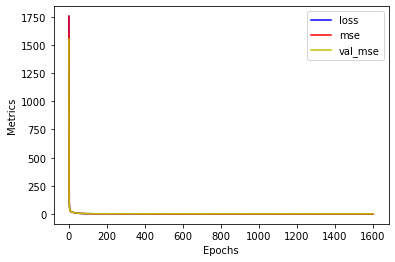

In [38]:
plt.figure()
plt.plot(a.index,a.loss,c='blue',label='loss')
plt.plot(a.index,a.mse, c='r',label='mse')

plt.plot(a.index, a.val_mse,c='y', label='val_mse')

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

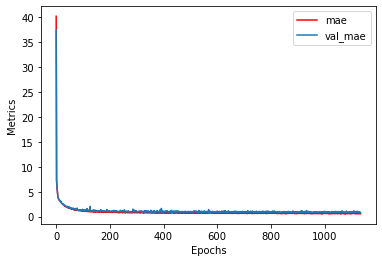

In [51]:
plt.figure()
plt.plot(a.index, a.mae,c='r', label='mae')
plt.plot(a.index, a.val_mae, label='val_mae')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

In [39]:
r2_score(y_train,model.predict(X_train))


39/39 [==============================] - 0s 4ms/step


0.9947862852020589

In [40]:
ann=pd.DataFrame(y_test)
pred=pd.DataFrame(model.predict(X_test),columns=['IFT ANN model'])

17/17 [==============================] - 0s 4ms/step


In [42]:
ann.index=pred.index
ann=pd.concat([ann,pred],axis=1)
ann.to_csv('ITF_without_phase_new_1_0.989_r2.csv')

In [43]:
model.save("IFT_Model_new_no_phase_0.989_r2.h5")

In [44]:
# if you don't like, be there!!

In [20]:
model=tf.keras.models.load_model("IFT_Model_new_no_phase_0.989_r2.h5")

In [21]:
df=pd.DataFrame(y_train) 
df

,IFT
1460,58.97
1304,35.89
687,33.80
1540,64.00
447,47.87
...,...
1142,68.52
998,55.10
1725,36.78
206,31.30


In [22]:
d2=pd.DataFrame(model.predict(X_train), columns=['IFT_pred'])
d2.index=df.index

39/39 [==============================] - 1s 3ms/step


In [24]:
df=pd.concat([df,d2],axis=1)

In [25]:
df.to_csv("ANN actual values vs Predicted values without Phase_tuned_train!.csv")